In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("KNN Problem_ Data Set.csv")

In [2]:
!ls

 3-1LinearRegrExcercise.ipynb
 3-2hiring.csv
 3-2homeprices.csv
 3-2LinearRegMultivariate.ipynb
 3-3,4GradientDescent.ipynb
 3-6homeprices.csv
'aug 29.ipynb'
'K Means Cluster Problem_ Data Set.csv'
'KNN Problem_ Data Set.csv'
'LinearRegression Categorical Variables.ipynb'
'Linear regression with multiple variables..ipynb'
'Logistic Regression.ipynb'
'Week14 LinearRegression Q1.ipynb'
'Week 15 K mean.ipynb'
'Week 15 knn.ipynb'


In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(x_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[106  43]
 [ 33 118]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       149
           1       0.73      0.78      0.76       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [18]:
errors = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    errors.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

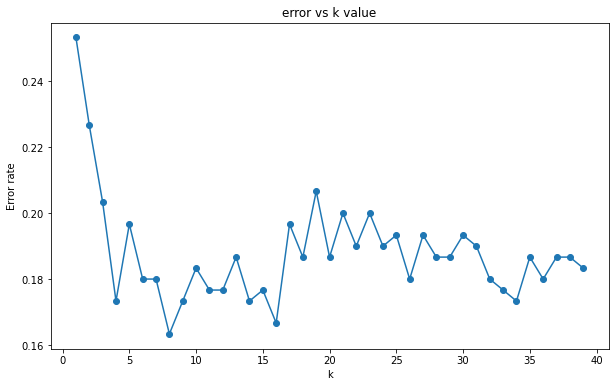

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),errors,marker="o")
plt.title("error vs k value")
plt.xlabel("k")
plt.ylabel("Error rate")

In [31]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[118  31]
 [ 22 129]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       149
           1       0.81      0.85      0.83       151

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

